### Задача uplift-моделирования

### План занятия

* Введение: коммуникация с пользователями
* Дизайн эксперимента
* Типы клиентов
* Одна модель с дополнительным признаком
* Вариант с двумя независимыми моделями
* Вариант с двумя зависимыми моделями
* Прямой расчет uplift: "деревянные" модели
* Ссылки

### Введение

Часто возникает необходимость коммуникации с пользователями для продвижения сервисов и услуг.

Коммуникация осуществляется с помощью различных каналов: смс, звонки, push-уведомления, сообщения в чатботе и т.д

Например, мы хотим отправить push-уведомление игрокам в мобильной игре о том, что у них заполнились склады или об ином внутриигровом событии. Либо даже хотим отправить уведомление о наступающем внутриигровом эвенте (которые очень важны для активных игроков и для монетизации и развития игры в целом).

Другой пример:

Мы хотим прорекламировать популярный продукт, но при этом не хотим тратить бюджет на коммуникацию с пользователями, которые и без нас его купят. 

Изначально вопрос у нас такой: <b>Какова вероятность, что пользователь совершит нужное нам действие?</b>

Но нам нужен ответ не на него.

### Пример - задача прогнозирования оттока

Подробно задачу будем разбирать на следующем занятии, но давайте договоримся, что решать мы ее уже умеем.

Т.е мы для пользователей нашего сервиса можем посчитать вероятность ухода в отток.

![ab_split](images/churn.png "churn1")

Мы можем для пользователя определить вероятность:

P(User)

Мы хотим удерживать наших пользователей, которые чем-то недовольны или несчастны и хотим им предложить более выгодные условия подписки или тарифа (например, если мы - мобильный оператор, то мы можем предложить нашим абонентам более выгодный тариф).

Хорошо, мы можем отобрать из нашей аудитории наиболее "несчастных". Почему бы просто не сделать им предложение? В чем проблема? 

Проблема в том, что разные пользователи реагируют на коммуникацию по-разному и каждое взаимодействие стоит для нас денег.

И еще проблема - <b>наша модель неидеальна!</b>

#### Типы пользователей по реакции на коммуникацию

![ab_split](images/uplift_client_types.png "uplift_client_types")

1. Пользователи, которые совершат нужное действие независимо от коммуникации
2. Те, кто совершат действие, если будет коммуникация
3. Те, кто не совершит действие независимо от коммуникации
4. Не совершат действие, если коммуникация будет

Для оптимизации эффекта от воздействия хочется посчитать разницу реакций пользователя при наличии коммуникации и при ее отсутствии. 

Проблема в том, что мы не можем одновременно совершить коммуникацию и не совершить коммуникацию.

![ab_split](images/uplift2.png "uplift_cats")

Что же делать?

Необходимо оценить разницу между двумя событиями, которые являются взаимоисключающими для конкретного пользователя.

Для этого нам нужна обучающая выборка. А для нее нужно просто провести эксперимент. 

1. Берем часть базы пользователей и разбиваем на 2 группы: контрольную и экспериментальную
2. На экспериментальной группе запускаем маркетинговую кампанию (совершаем коммуникацию)
3. Через какое-то время у нас есть результаты совершения нужного действия клиентами в обеих группах (включая контрольную)
4. Проводим uplift-моделирование

![ab_split](images/uplift_3.png "uplift3")

$P^T$ - звоним клиенту, $P^C$ - не звоним клиенту. Если uplift < 0, то клиенту нельзя звонить, > 0 - можно звонить.

![ab_split](images/uplift_scheme.png "uplift_scheme")

*взято из https://habr.com/ru/company/ru_mts/blog/485980/

### Пример модели с дополнительным признаком

Другие названия: Treatment Dummy approach, Solo model approach, Single model approach, S-Learner 

$W_i$ - информация о коммуникации (было или не было, 1 или 0)<br>
$y_i$ - целевое действие (реакция на коммуникацию)

![ab_split](images/uplift_single_model.png "uplift_single_model")

Модель одна, но с разными значениями признака $W_i$

Но в целом признак $W_i$ некая фикция, потому что не может быть такого клиента, с которым мы и говорили и не говорили одновременно.

Перейдем к более сложной ситуации

### Две независимые модели

Другие названия: Two models approach, T-learner, difference two models

Интуитивно понятный и простой метод - моделируем 2 условные вероятности

1. обучаем модель прогноза вероятности совершения целевого действия для контрольной группы
2. обучаем модель прогноза вероятности совершения целевого действия для экспериментальной группы
3. на прогнозе - делаем прогноз для тестовых пользователей двумя моделями и вычитаем из прогноза второй модели прогноз первой

![ab_split](images/uplift_2models.png "uplift_2models")

T - treatment - те с кем была коммуникация => модель

C - control - те с кем не было коммуникации => модель

Модели получаеются независимыми, а значит нет четкого совмещения вероятностей первой модели со второй. И хорошо бы перед тем, как вычитать вероятности, как-то откалибровать модели.

Можно, к примеру, для обучения одной модели использовать знание о решении первой модели, то есть получаются уже перекрестные модели.

![ab_split](images/uplift_3models.png "uplift_3models")

1. Учим модель предсказывать что будет, если коммуникации не было.
2. Дальше мы берем клиентов и строим вторую часть модели. Делаем предсказание наших клиентов по натренерованной модели
3. Пытаемся вставить предсказание из п.2 в нашу новую модель в качестве признака для treatment.

Мы тем самым более менее выровняли вероятности одной и другой модели.

p(y=1|w=1), p(y=1|w=0)

### Практический пример с соревнования X5 

http://retailhero.ai/#rec141268104

Импортируем нужные библиотеки и предобработаем данные:

In [1]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Чтение данных
df_clients = pd.read_csv('uplift_data/clients.csv', index_col='client_id')
df_train = pd.read_csv('uplift_data/uplift_train.csv', index_col='client_id')
df_test = pd.read_csv('uplift_data/uplift_test.csv', index_col='client_id')

# Извлечение признаков
df_features = df_clients.copy()
df_features['first_issue_time'] = \
    (pd.to_datetime(df_features['first_issue_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['first_redeem_time'] = \
    (pd.to_datetime(df_features['first_redeem_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['issue_redeem_delay'] = df_features['first_redeem_time'] \
    - df_features['first_issue_time']

df_features = df_features.drop(['first_issue_date', 'first_redeem_date'], axis=1)
df_features.fillna(0, inplace=True)

indices_train = df_train.index
indices_test = df_test.index
indices_learn, indices_valid = train_test_split(df_train.index, test_size=0.3, random_state=123)

In [2]:
df_clients

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
000048b7a6,2018-12-15 13:33:11,NaN,68,F
000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...
fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F


In [3]:
df_features.head()

,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
000012768d,45,U,1501947648,1.515094e+09,13146559.0
000036f903,72,F,1491832463,1.492951e+09,1118613.0
000048b7a6,68,F,1544880791,0.000000e+00,0.0
000073194a,60,F,1495544174,1.511522e+09,15978107.0
00007c7133,67,U,1495469828,1.546277e+09,50806825.0


In [4]:
df_test.head(3)

""
client_id
000048b7a6
000073194a
00007c7133


In [5]:
df_train

,treatment_flg,target
client_id,,
000012768d,0,1
000036f903,1,1
00010925a5,1,1
0001f552b0,1,1
00020e7b18,1,1
...,...,...
fffe0abb97,0,0
fffe0ed719,0,1
fffea1204c,0,1


Посмотроим на целевое свойство:

In [6]:
df_train.groupby("treatment_flg")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_flg,,,,,,,,
0,100058.0,0.603280,0.489219,0.0,0.0,1.0,1.0,1.0
1,99981.0,0.636511,0.481006,0.0,0.0,1.0,1.0,1.0


Заведем переменные для работы uplift модели

In [7]:
# данные для обучения
X_train = df_features.loc[indices_learn, :] # признаки о клиенте (в них остались описания клиентов) - X
y_train = df_train.loc[indices_learn, 'target'] # целевой признак (те кто сделал правильные действия) - Y
treat_train = df_train.loc[indices_learn, 'treatment_flg'] # те кому написали смс с предложением - W

# данные для валидации
X_val = df_features.loc[indices_valid, :] # X
y_val = df_train.loc[indices_valid, 'target'] # Y
treat_val =  df_train.loc[indices_valid, 'treatment_flg'] # W

# весь набор целиком
X_train_full = df_features.loc[indices_train, :] # X
y_train_full = df_train.loc[:, 'target'] # Y
treat_train_full = df_train.loc[:, 'treatment_flg'] # W
# данные из теста
X_test = df_features.loc[indices_test, :]
# наш категорийный признак
cat_features = ['gender']
# словарь для записи результатов 
models_results = {
    'approach': [],
    'uplift@30%': []
}

Описание клиента:

In [8]:
X_train.head()

,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
ad6561e2d8,50,F,1512322431,1.527102e+09,14779510.0
7c1ccbf93f,24,F,1510331629,1.519326e+09,8994516.0
b58fadcab6,36,U,1509657465,1.537045e+09,27387871.0
e99e6fabb9,79,F,1526466080,1.527713e+09,1247284.0
27fb6f8520,34,F,1500320188,1.513332e+09,13012137.0


Описание взаимодействия:

In [9]:
treat_train.head()

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
Name: treatment_flg, dtype: int64

Описание нужного действия:

In [10]:
y_train.head()

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
Name: target, dtype: int64

### 1. Подходы с одной моделью
#### 1.1 Одна модель с признаком коммуникации
Самое простое и интуитивное решение: модель обучается одновременно на двух группах, при этом бинарный флаг коммуникации выступает в качестве дополнительного признака. Каждый объект из тестовой выборки скорим дважды: с флагом коммуникации равным 1 и равным 0. Вычитая вероятности по каждому наблюдению, получим искомы uplift.

![ab_split](images/uplift4.png "uplift4")

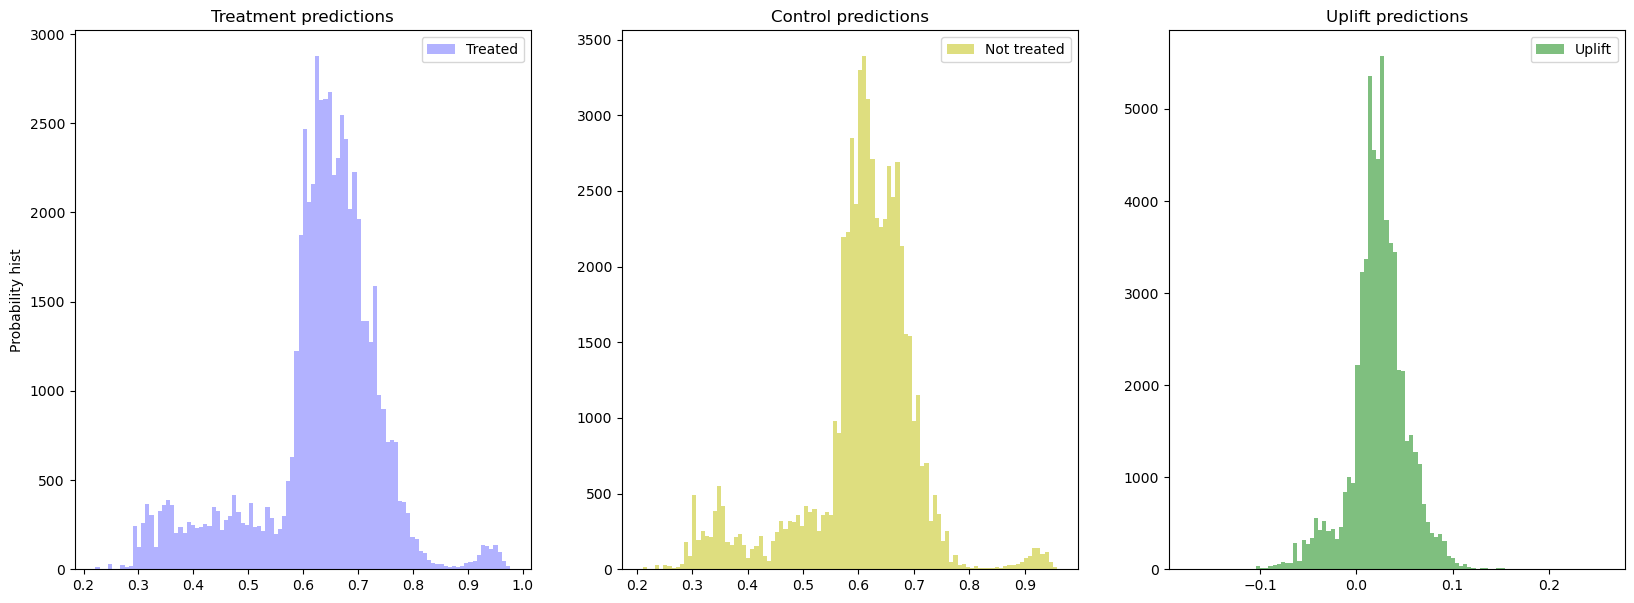

In [11]:
# Инструкция по установке пакета: https://github.com/maks-sh/scikit-uplift
# Ссылка на документацию: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel

# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier


sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_val)

# размер uplift на топ k процентах выборки
sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds);

---

### Метрики

**Метрика uplift@k**

$$uplift@k = response \; rate@k_{treatment} - response\; rate@k_{control}$$

$$response \; rate@k = mean(Y@k)$$

Размер uplift на топ $k$ процентах выборки.

Например, с помощью обученной uplift модели мы хотим отобрать какое-то количество клиентов, с которыми будем коммуницировать. Пусть бюджет рассчитан на $k$% клиентов. Тогда нам интересно оценить качество прогноза не на всей тестовой выборке, а только на объектах с наибольшими предсказаниями при отсечении по порогу в $k$ процентов.

Для расчета uplift@k нужно отсортировать выборку по величине предсказанного uplift и посмотреть разницу средних значений таргета Y в экспериментальной и контрольной группах.

Теоретический uplift@k принимает значения от -1 (когда в целевой группе нет реакций Y=1, а в контрольной группе все клиенты имеют реакцию Y=1) и может достигать величины 1 (противоположная ситуация: в целевой группе все клиенты откликнулись: Y=1, в то время как в контрольной - ни одного случая с Y=1)

Расчитывать метрику можно двумя различными способами:
1. сначала сортировать по предсказанному uplift и далее считать разницу response rate двух групп (`strategy='overall'`)
2. или наоборот, изначально сортировать объекты из контрольной и целевой групп по отдельности (`strategy='by_group'`)

In [12]:
n=15
df = pd.DataFrame({
    'true': y_val[:n],
    'uplift':uplift_sm[:n],
    'treat': treat_val[:n]
})
df

,true,uplift,treat
client_id,,,
a9a604ed6e,0,-0.002221,1
ebd7360016,1,0.044462,0
908cd9b8e8,1,0.055119,1
dceb8ce861,0,0.012658,0
f4f0ac6b06,0,0.018084,0
5047ab8574,0,0.026925,1
e3574a0076,1,0.033572,1
4789764e7d,0,0.018636,1
7e66529579,1,0.027664,1


overall:

In [13]:
k=0.7
uplift_at_k(y_true=df['true'], uplift=df['uplift'], treatment=df['treat'], 
#     strategy='by_group',
    strategy='overall',
    k=k)

-0.4

In [14]:
df_k=df.sort_values(by='uplift', ascending=False).head(int(n*k))
df_k

,true,uplift,treat
client_id,,,
908cd9b8e8,1,0.055119,1
ebd7360016,1,0.044462,0
2c1ea1e175,1,0.039352,0
e3574a0076,1,0.033572,1
5f9a02e6a5,1,0.029808,0
7e66529579,1,0.027664,1
5047ab8574,0,0.026925,1
2c90382a10,1,0.026808,0
81486dfd30,1,0.025498,0


In [15]:
response_rate_treat = df_k[(df_k.treat==1)].true.mean()
response_rate_control= df_k[(df_k.treat==0)].true.mean()
response_rate_treat - response_rate_control

-0.4

by_group:

In [16]:
k=5
uplift_at_k(y_true=df['true'], uplift=df['uplift'], treatment=df['treat'], 
    strategy='by_group',
#     strategy='overall',
    k=k)

-0.4

In [17]:
df_k_treat = df[df.treat==1]
df_k_treat = df_k_treat.sort_values(by='uplift', ascending=False).head(k)

df_k_control = df[df.treat==0]
df_k_control = df_k_control.sort_values(by='uplift', ascending=False).head(k)
df_k_treat

,true,uplift,treat
client_id,,,
908cd9b8e8,1,0.055119,1
e3574a0076,1,0.033572,1
7e66529579,1,0.027664,1
5047ab8574,0,0.026925,1
4789764e7d,0,0.018636,1


In [18]:
df_k_control

,true,uplift,treat
client_id,,,
ebd7360016,1,0.044462,0
2c1ea1e175,1,0.039352,0
5f9a02e6a5,1,0.029808,0
2c90382a10,1,0.026808,0
81486dfd30,1,0.025498,0


**Метрика uplift curve**

$$uplift\;curve(t) = \Bigg(\frac{Y_{t}^{T}}{N_{t}^{T}} - \frac{Y_{t}^{C}}{N_{t}^{C}}\Bigg)\cdot\Bigg(N_{t}^{T} + N_{t}^{C}\Bigg)$$

$t$ - накопившееся количество объектов<br>
$Y_{t}^{T}, Y_{t}^{C}$ - таргет в treatment и control группах <br>
$N_{t}^{T}, N_{t}^{C}$ - размер treatment и control группа

Uplift кривая строится как функция от количества объектов, нарастающим итогом. В каждой точке кривой можно увидеть накопленный к этому моменту uplift

На картинке ниже расположен типичный график идеальной, модельной и случайной кривых. Каждая точка на такой кривой соответствует значению кумулятивного uplift. Чем больше это значение, тем лучше. Монотонно возрастающая случайная кривая показывает, что воздействие всей выборки имеет общий положительный эффект.

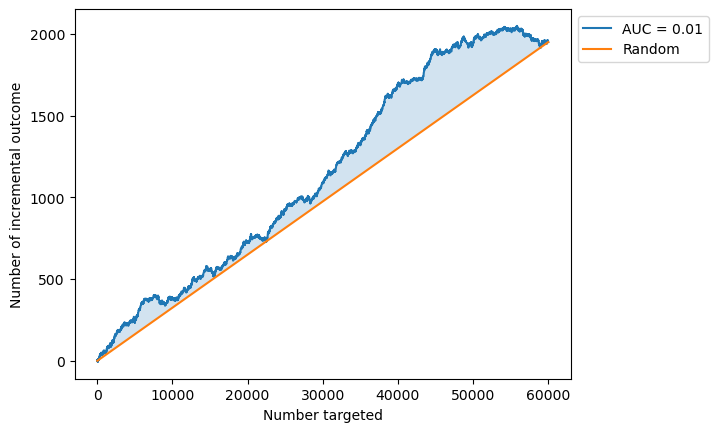

In [19]:
from sklift.viz import plot_uplift_curve

plot_uplift_curve(y_val, uplift_sm, treat_val, perfect=False);

В идеале кривая должна двигаться вверх и лево: /```

**Метрика Qini curve**

$$qini\;curve(t) = Y_{t}^{T} - \frac{Y_{t}^{C}N_{t}^{T}}{N_{t}^{C}}$$

$Y_{t}^{T}, Y_{t}^{C}$ - таргет в treatment и control группах <br>
$N_{t}^{T}, N_{t}^{C}$ - размер treatment и control групп

Qini curve, как и другие аплифт метрики, рассчитывается кумулятивно сразу для набора объектов. Кривую Qini для модели тоже сравнивают со случайно кривой и с идеальным случаем. Аналагично uplift curve, чем выше кривая над случайной кривой, тем лучше.

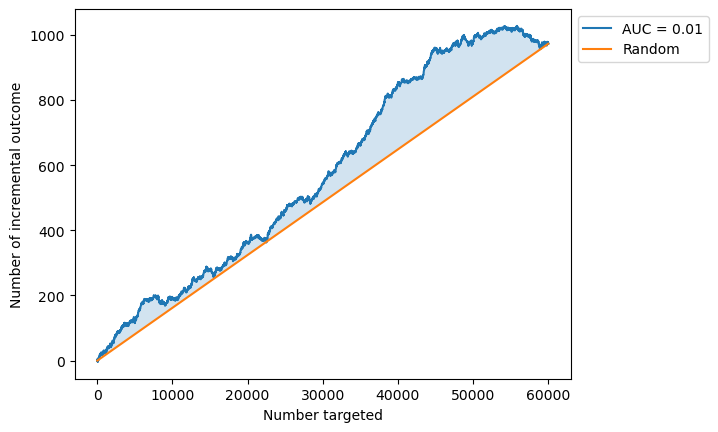

In [20]:
from sklift.viz import plot_qini_curve

plot_qini_curve(y_val, uplift_sm, treat_val, perfect=False);

In [21]:
from sklift.metrics import qini_auc_score

auqc = qini_auc_score(y_val, uplift_sm, treat_val)
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.0070


**Метрика Uplift by percentile**

Бывает так, что со стороны бизнеса неизвестно значение порога $k$ и хочется посмотреть, как будет вести себя метрика при разных $k$

При построении действуем по аналогии с uplift@k:
1.  Сортируем по предскзаанному значению uplift
2. Делим отсортированные данные на перцентили/децили/бины
3. В каждом перцентиле отдельно оцениваем uplift как разность между средними значениями целевой переменной в тестовой и контрольной группах

Результатом этой метрики является таблица или ее визуальное представление в виде графика.<br>
Давайте также для каждого перцентиля расчитаем следующие показатели:
1. n_treatment - размер целевой (или treatment) группы
2. n_control
3. response_rate_treatment - среднее значение таргета целевой группы (звоним)
4. response_rate_control - среднее значение таргета контрольной группы (не звоним)
5. uplift=response_rate_treatment - response_rate_control

Дополнительно добавим расчет СКО для каждой метрики (std_treatmen, std_control, std_uplift) для того, чтобы оценивать разброс метрики в каждом перцентиле.

In [22]:
from sklift.metrics import uplift_by_percentile

uplift_by_percentile(y_val, uplift_sm, treat_val, strategy='overall', total=True, std=True, bins=10)

,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,2992,3010,0.709225,0.649502,0.059723,0.008302,0.008697,0.012023
10-20,3011,2991,0.673530,0.660983,0.012547,0.008546,0.008656,0.012163
20-30,2960,3041,0.665203,0.632358,0.032845,0.008674,0.008744,0.012316
30-40,3015,2986,0.665340,0.626256,0.039084,0.008594,0.008854,0.012338
40-50,2994,3007,0.650301,0.612571,0.037730,0.008715,0.008884,0.012445
50-60,3038,2963,0.659645,0.607830,0.051815,0.008597,0.008969,0.012424
60-70,3112,2889,0.651028,0.595708,0.055320,0.008544,0.009130,0.012505
70-80,3058,2943,0.612165,0.575943,0.036222,0.008811,0.009110,0.012674
80-90,2959,3042,0.547482,0.534517,0.012965,0.009150,0.009044,0.012865


Так как коммуникация будет проводится с клиентами, получившими наибольшую оценку uplift, то слева на графике должны быть максимальные по модулю положительные значения uplift и в следующих перцентилях значения уменьшаются.

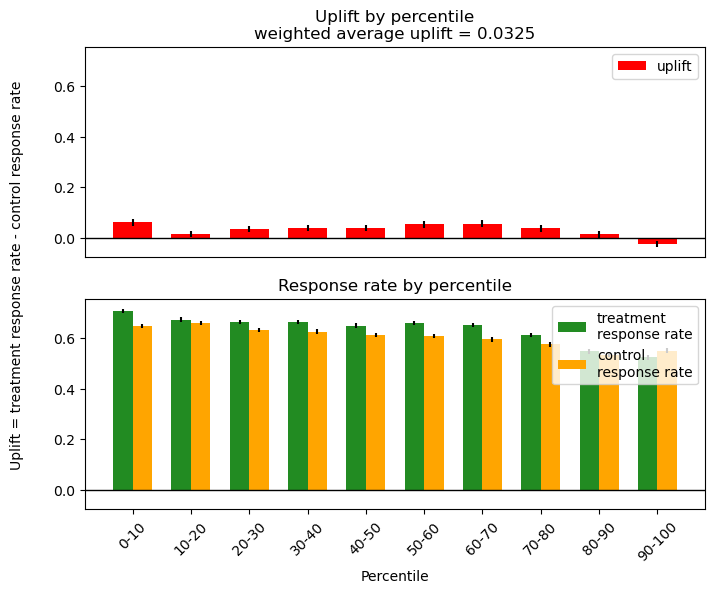

In [23]:
from sklift.viz import plot_uplift_by_percentile

plot_uplift_by_percentile(y_val, uplift_sm, treat_val, strategy='overall', kind='bar');

В левой части графика находятся убеждаемые. То есть Y=1 при W=1 и Y=0 при W=0

**Метрика Weighted average uplift**

In [24]:
from sklift.metrics import weighted_average_uplift

uplift_full_data = weighted_average_uplift(y_val, uplift_sm, treat_val, bins=10)
print(f"weighted average uplift on full data: {uplift_full_data:.4f}")

weighted average uplift on full data: 0.0317


Weighted average uplift лежит в пределах [-1, 1].

Если метрика принимает значение 1, это значит, что реакций Y=1 в контрольной группе нет ни в одном перцентиле: пользователи никогда не выполняют целевое действие самостоятельно, а только при коммуникации. При таком значении метрики нет смысла решать задачу с помощью uplift моделирования.

Если метрика принимает значение -1, то это будет означать, что во всех перцентилях uplift был равен -1. Такое происходит, когда в целевой группе нет реакций Y=1, а в контрольной группе все клиенты имеют реакцию Y=1. Получается, что значения метрики, которые нас устраивают в рамках решения uplift задачи, лежат в пределах [0, 1).

---

Вернемся обратно и посмотрим на топ-признаки

In [25]:
# С той же легкостью можно обратиться к обученной модели.
# Например, чтобы построить важность признаков:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,first_redeem_time,44.503470
1,issue_redeem_delay,37.136251
2,age,7.075808
3,first_issue_time,5.801921
4,treatment,3.322136
5,gender,2.160415


#### 1.2 Трансформация классов
Достаточно интересный и математически подтвержденный подход к построению модели, представленный еще в 2012 году. Метод заключается в прогнозировании немного измененного таргета:

![ab_split](images/uplift5.png "uplift5")

![ab_split](images/uplift_client_types.png "uplift_client_types")

In [26]:
# меняет SoloModel на ClassTransformation
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

ct_score = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation')
models_results['uplift@30%'].append(ct_score)

In [27]:
# uplift@k для 30%
ct_score

0.05738718188867742

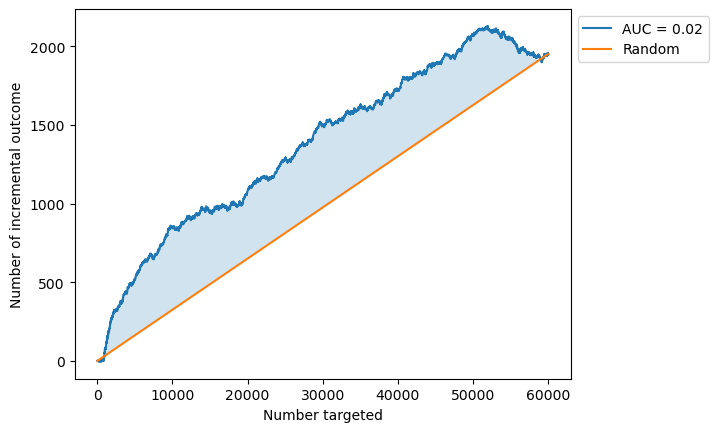

In [28]:
plot_uplift_curve(y_val, uplift_ct, treat_val, perfect=False);

#### 2.1 Две независимые модели
Как понятно из названия, подход заключается в моделировании условных вероятностей тестовой и контрольной групп отдельно. В статьях утверждается, что такой подход достаточно слабый, так как обе модели фокусируются на прогнозировании результата отдельно и поэтому могут пропустить "более слабые" различия в выборках.

![ab_split](images/uplift6.png "uplift6")

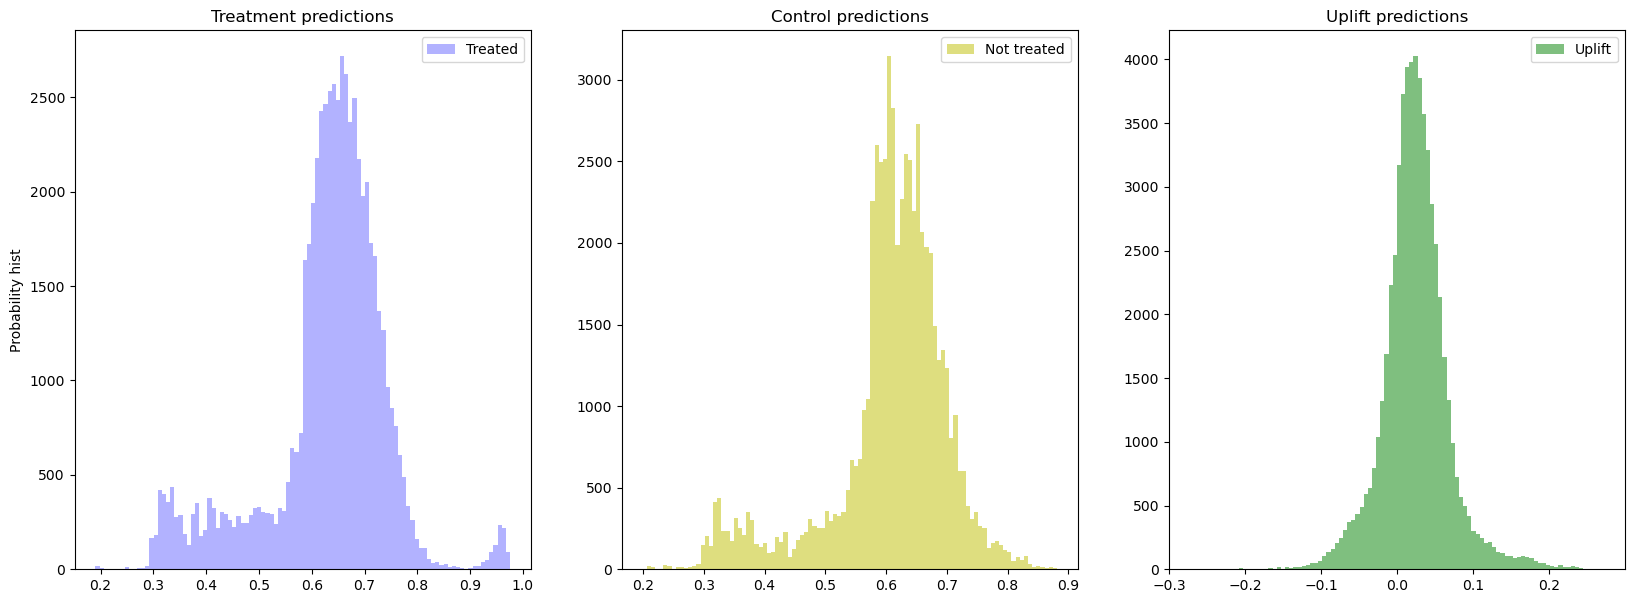

In [29]:
# ставим 2 модели
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

Посмотрим на результаты

In [30]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
1,ClassTransformation,0.057387
2,TwoModels,0.054543
0,SoloModel,0.034983


#### Вариант с деревом решений

Модели с деревянным предсказанием. Прямое предсказание.

In [31]:
X_train_tree = pd.concat([X_train.drop('gender', 1), 
                          pd.get_dummies(X_train['gender'], prefix='gender')], 1)
features = [col for col in X_train_tree]

In [32]:
X_train_tree.head()

,age,first_issue_time,first_redeem_time,issue_redeem_delay,gender_F,gender_M,gender_U
client_id,,,,,,,
ad6561e2d8,50,1512322431,1.527102e+09,14779510.0,1,0,0
7c1ccbf93f,24,1510331629,1.519326e+09,8994516.0,1,0,0
b58fadcab6,36,1509657465,1.537045e+09,27387871.0,0,0,1
e99e6fabb9,79,1526466080,1.527713e+09,1247284.0,1,0,0
27fb6f8520,34,1500320188,1.513332e+09,13012137.0,1,0,0


In [33]:
%%time
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

uplift_model = UpliftTreeClassifier(max_depth=4, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)

CPU times: total: 3.47 s
Wall time: 3.51 s


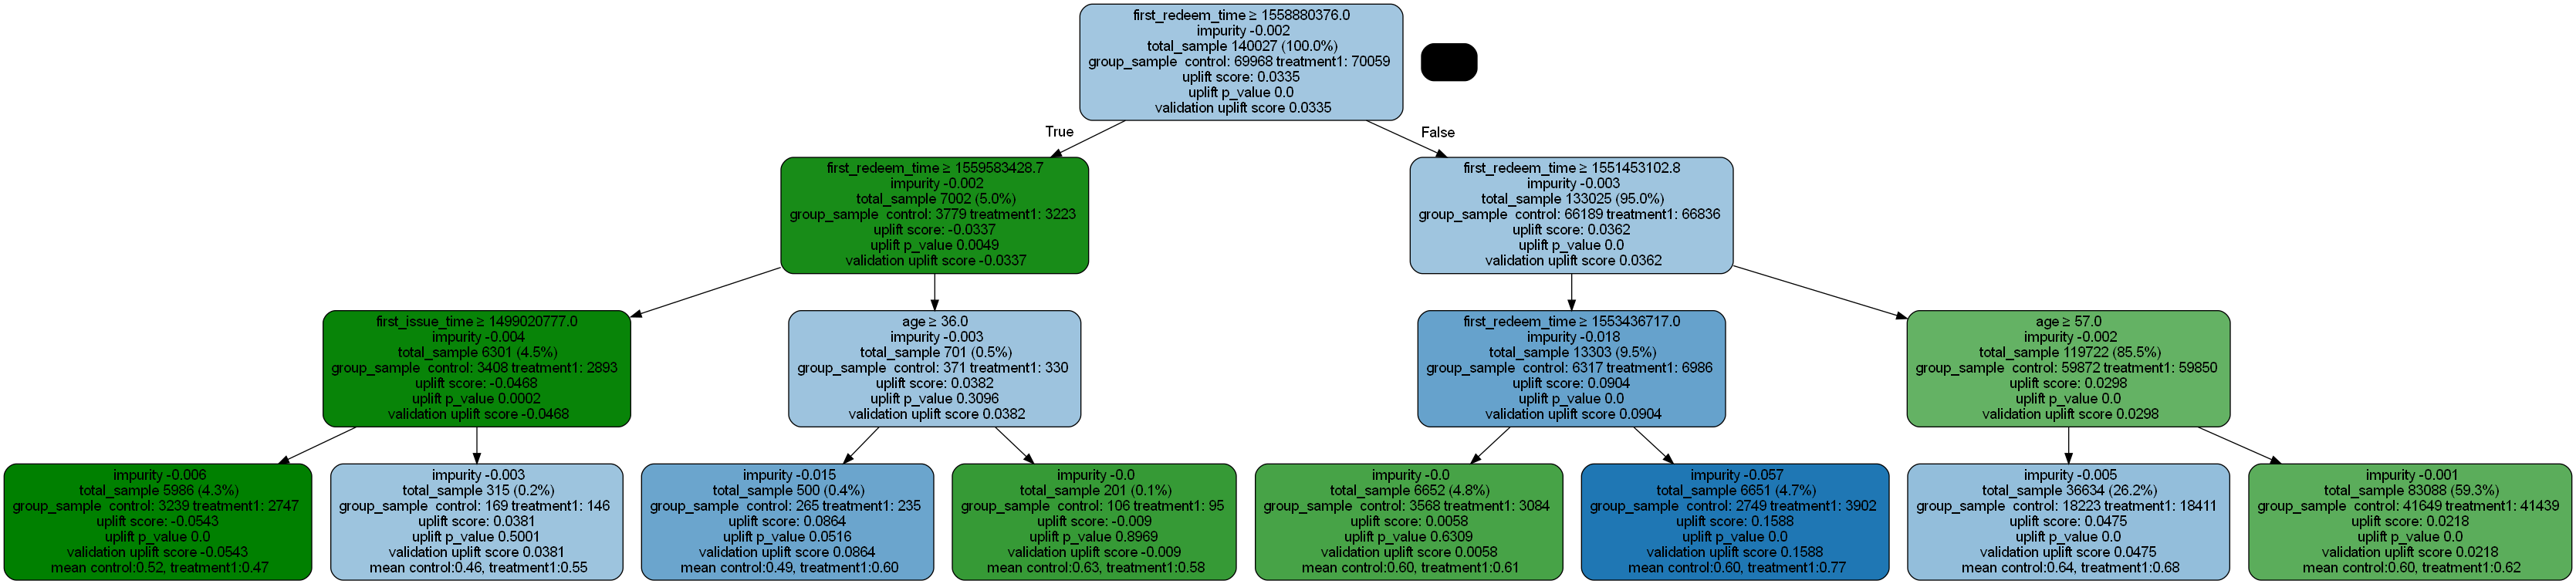

In [34]:
Image(graph.create_png())

И что это? Тут прям написаны конкретно сколько uplift score и как они разделены на группы.

### Домашнее задание

1. скачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention
2. там поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.
3. сделать разбиение набора данных не тренировочную и тестовую выборки
4. сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)
5. провести uplift-моделирование 3 способами: 
    * одна модель с признаком коммуникации (S learner), 
    * модель с трансформацией таргета (трансформация классов п. 2. 1),
    * вариант с двумя независимыми моделями
6. в конце вывести единую таблицу сравнения метрик uplift@10%, uplift@20% этих 3 моделей
7. построить модель UpliftTreeClassifier и попытаться описать словами полученное дерево
8. (опционально) для модели S learner (модель с дополнительным признаком коммуникации) построить зависимость таргета (конверсии - поле conversion) от значения uplift: 
    * сделать прогноз и получить uplift для тестовой выборки 
    * отсортировать тестовую выборку по uplift по убыванию 
    * разбить на децили (pandas qcut вам в помощь) 
    * для каждого дециля посчитать среднюю conversion
9. (опционально) построить модель UpliftRandomForestClassifier и попытаться описать словами полученное дерево

### Ссылки

1. https://towardsdatascience.com/a-quick-uplift-modeling-introduction-6e14de32bfe0
2. https://habr.com/ru/company/ru_mts/blog/485980/#reference1
3. https://en.wikipedia.org/wiki/Uplift_modelling
4. https://www.youtube.com/watch?v=yFQAIJBYXI0
5. https://www.youtube.com/watch?v=jCUcYiBK03I
6. https://www.uplift-modeling.com/en/latest/
7. https://arxiv.org/pdf/1809.04559.pdf
8. https://catboost.ai/docs/concepts/about.html

### Библиотеки и пакеты

1. causalml
2. sklift
3. catboost

---